## Equação Normal

Nexte exemplo, iremos usar a equação normal para encontrar os pesos da função hipótese que iremos definir.

Nós implementaremos a equação normal com as bibliotecas:
+ NumPy
+ Scikit-learn

### Importanto as bibliotecas

In [ ]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

#### Scikit-learn

Scikit-learn é uma biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python.

Ela inclui vários algoritmos de aprendizado de máquina para problemas de regressão, classificação e agrupamento (i.e., clustering).

Nesse exemplo, nós usaremos a classe `LinearRegression`da da bibioteca SciKit-Learn, a qual implementa a **equação normal**.

In [ ]:
# Import the linear regression module from the scikit learn library.
from sklearn.linear_model import LinearRegression

### Resetando gerador de sequências pseudo-aleatórias

In [ ]:
# Resetando gerador de sequências pseudo-aleatórias de forma que os resultados apresentados sejam sempre os mesmos independentemente do momento em que o notebook seja executado.
seed = 1234
np.random.seed(seed)

### Gerando a função observável.

A **função objetivo** (ou seja, a função que queremos aproximar) é dada por

$$y = 4 + 3x,$$

com $a_0=4$ e $a_1=3$. São esses valores que "desconhecemos" e que queremos aproximar.

A **função observável** (versão ruidosa da função objetivo, $y$) é dada por

$$y_{noisy} = y + w,$$

onde $w$ é o ruído adicionado às amostras da função objetivo. Neste exemplo, para corromper as amostras da função objetivo, usaremos amostras de uma distribuição normal padrão.
</br>


**Observações**:

+ Lembrem-se que, em geral, mesmo que exista uma **função objetivo**, nós temos acesso apenas à sua **versão ruidosa**.
+ Nós definimos uma função objetivo apenas para gerar sua versão ruidosa e mostrar que podemos encontrar uma boa aproximação mesmo com amostras contaminadas por ruído.
+ Notem que geramos apenas 100 amostras.

In [ ]:
# Number of observations (pairs of features and labels).
N = 100

# Attribute.
# O reshape faz com que a sequência criado pela função linspace seja convertida em um vetor coluna.
x = np.linspace(0, 2, N).reshape(N, 1)

# Target function.
y = 4.0 + 3.0*x  # equação de uma reta.

# Standard Normal Gaussian Noise (mean equal to 0 e variance equal to 1).
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

### Comparando a função observável com a função objetivo.

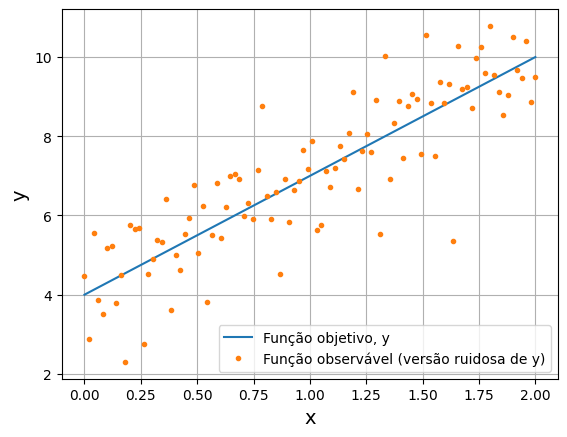

In [ ]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y, label='Função objetivo, y')
plt.plot(x, y_noisy, '.', label='Função observável (versão ruidosa de y)')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Encontrando a solução ótima com a equação normal implementada com a biblioteca NumPy.

Inicialmente, iremos **trapacear** e assumir que o formato da função hipótese sempre será o de um hiperplano, no caso deste exemplo, uma **reta**, e iremos focar apenas em encontrar os pesos que minimizem a função de erro.
</br>

Porém, mais adiante no curso, veremos estratégias para encontrar, além dos pesos, o formato mais adequado para a função hipótese.
</br>

Portanto, a função hipótese que utilizaremos neste exemplo é dada por

$$h(\textbf{x}[i]) = \hat{y} = \hat{a}_0 + \hat{a}_1 x[i],$$

onde $\hat{a}_0$ e $\hat{a}_1$ são **aproximações** dos valores **verdadeiros** dos pesos da **função objetivo**.
</br>

A função hipótese pode ser reescrita **considerando todos os exemplos** (i.e., pares $\textbf{x}[i]$ e $y[i]$) em formato matricial como

$$ \hat{\textbf{y}} = \textbf{X}\hat{\textbf{a}},$$

onde $\textbf{X}$ é a matriz de atributos, a qual contém todos os $N$ vetores de atributos, e $\hat{\textbf{a}}$ é o vetor coluna com os pesos estimados pela equação normal.
</br>

**OBS**.: Percebam que a função hipótese inclui o peso de bias, $\hat{a}_0$, portanto, precisamos criar o **vetor de atributo de bias** com todos os valores iguais a 1 para poder representar a função hipótese no formato matricial.

In [ ]:
# É uma rotina que np.c_ concatena vetores.
X = np.c_[np.ones((N, 1)), x] # add column vector x0 with all values equal to 1.

# Solve by applying the least-Squares method.
# We use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix.
# We use dot() method for matrix multiplication.
a_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_noisy)

# Print best solution.
print('a0: %1.4f' % (a_numpy[0, 0]))
print('a1: %1.4f' % (a_numpy[1, 0]))

a0: 4.0696
a1: 2.9656


#### Realizando predições com a função hipótese e calculando o erro quadrático médio obtido com ela.

Usamos a função hipótese em sua forma matricial,

$$ \hat{\textbf{y}} = \textbf{X}\hat{\textbf{a}},$$
para realizar predições com **todos os vetores de atributos**, $\textbf{x}[i]$, que temos.

**OBS**.: Notem que a variável `yhat_numpy` abaixo é um **vetor coluna** com as predições feitas para cada vetor de atributos, $\textbf{x}[i]$, da matriz de atributos, $\textbf{X}$.

In [ ]:
# Performing predictions with the hypothesis function.
yhat_numpy = X.dot(a_numpy)
print('Dimensões de yhat_numpy:', yhat_numpy.shape)

# Calculating the Mean Squared Error (MSE).
Je_optimum = (1.0/N)*np.sum(np.power((y_noisy - yhat_numpy), 2))

# Print the MSE.
print('MSE: %1.6f' % Je_optimum)

Dimensões de yhat_numpy: (100, 1)
MSE: 0.990985


### Encontrando a solução ótima com a equação normal implementada pela biblioteca Scikit-learn

Solução equivalente à implementada com a biblioteca NumPy usando a biblioteca Scikit-Learn.

In [ ]:
# Instantiate the LinearRegression class.
reg = LinearRegression()

# Train the SUPERVISED model.
# OBS.: O método "ravel()" transforma um vetor coluna em um vetor unidimensional, pois o método "fit" espera arrays de rótulos desta forma.
reg.fit(x, y_noisy.ravel())

# Print best solution.
print('a0: %1.4f' % (reg.intercept_)) # O atributo "intercept_" retorna o valor do peso de bias, ponto onde a função corta o eixo y.
print('a1: %1.4f' % (reg.coef_[0]))   # O atributo "coef_" é uma array unidimensional com os pesos associados aos atributos.

a0: 4.0696
a1: 2.9656


### Observações

+ Toda classe da biblioteca SciKit-Learn possui um método `fit` para **treinar** o modelo.
+ Percebam que o parâmetro $x$ passado para o método `fit` da classe `LinearRegression` é um vetor coluna com $N \times 1$.
+ Porém, lembrem-se que neste exemplo usamos uma **função hipótese com formato de reta**, e, portanto, temos o peso $a_0$.
+ Assim, deveríamos passar uma matriz com dimensão $N \times K+1$ para o método `fit`.
+ Entretanto, **por padrão**, a classe `LinearRegression` já faz isso automaticamente, ou seja, ela considera o peso $a_0$ internamente.
+ Caso sua função hipótese não considere o peso $a_0$, então, durante o instanciamento da classe `LinearRegression` vocês devem configurar o parâmetro `fit_intercept=False`.
+ Documentação da classe:
    + https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#### Realizando predições com a função hipótese e calculando o erro quadrático médio obtido com ela.

+ A classe `LinearRegression` possui um método `predict` que realiza as predições para o vetor ou matriz de atributos passado como parâmetro de entrada.

**OBS**.: Notem que `yhat_sklearn` é uma **array unidimensional** com as predições feitas para cada vetor de atributos, $\textbf{x}[i]$.

In [ ]:
# Performing predictions with the hypothesis function.
yhat_sklearn = reg.predict(x)
print('Dimensões de yhat_sklearn:', yhat_sklearn.shape)

# Calculating the Mean Squared Error (MSE).
# OBS.: Os dois vetores precisam ter as mesmas dimensões, caso contrário, o erro será alto.
Je_sklearn = (1.0/N)*np.sum(np.power((y_noisy.ravel() - yhat_sklearn), 2))

# Print the MSE.
print('MSE: %1.6f' % Je_sklearn)

Dimensões de yhat_sklearn: (100,)
MSE: 0.990985


### Comparando os resultados.

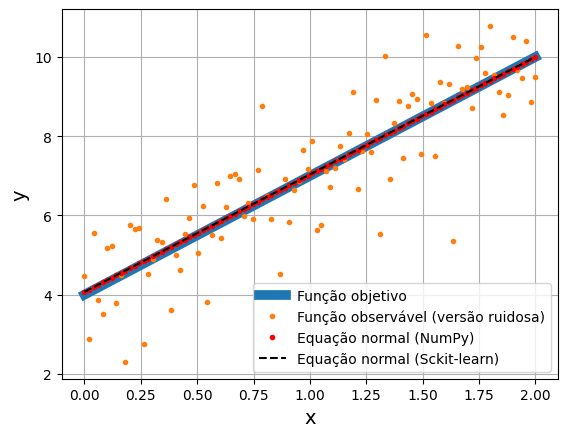

In [ ]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y, label='Função objetivo', linewidth=7)
plt.plot(x, y_noisy, '.', label='Função observável (versão ruidosa)')
plt.plot(x, yhat_numpy, 'r.', label='Equação normal (NumPy)', linewidth=4)
plt.plot(x, yhat_sklearn, 'k--', label='Equação normal (Sckit-learn)')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Observações

+ Com apenas 100 amostras, os valores obtidos para os pesos são próximos dos exatos, porém, o **ruído limita a aproximação exata**.
+ Se aumentarmos o número de exemplos, conseguimos melhorar a aproximação.
+ No limite, quando $N \to \infty$, temos
$$\hat{a}_0 \to a_0$$ e $$\hat{a}_1 \to a_1.$$
+ Porém, percebam que para termos valores idênticos aos exatos, teríamos que ter um número de amostras tendendo ao infinito, o que na prática, não é possível devido a limitações computacionais (e.g., memória e CPU).
+ Outra possibilidade para melhorar a aproximação é obter amostras com menor quantidade de ruído (e.g., ruído com menor variância), mas na maioria dos casos, por não termos controle sobre o processo de geração das amostras, isso se torna impossível.

## Por que o erro quadrático médio não é igual a zero?

+ Teoricamente, para $N \to \infty$, então $\hat{a}_0 =  a_0$, $\hat{a}_1 = a_1$ e $\hat{y} = y$. Portanto, se calcularmos o EQM quando $N \to \infty$, nós concluímos que

$$\lim_{N \to \infty} J_e(\textbf{a}) = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (y_{noisy} - \hat{y})^2 \\= \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (y + w - y)^2 \\= \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} w^2 = E[w^2].$$

ou seja, o **menor valor possível para o EQM** será igual ao **momento de ordem 2 do ruído**, e, como no caso desse exemplo ele tem média igual a zero, o menor valor do EQM se torna igual à variância do ruído.
+ Esse erro é chamado de **erro irredutível**, pois não conseguimos nos livrar dele.